# Interpolación lineal.

**Objetivo general.** Revisar e implementar una interpolación lineal y aplicarlas a datos reales.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import macti.visual as mvis

## Introducción

Dado un conjunto de datos del estilo:

|$x$  | $f(x)$ |
|---|---|
|$x_0$|$f(x_0)$|
|$\dots$|$\dots$|
|$x_k$|$f(x_k)$|

¿Será posible encontrar $f(x)$ para $x \notin [x_0, \dots, x_k]$ ?

Por ejemplo, para los datos que se usan en el artículo:  

<blockquote cite="https://doi.org/10.1016/j.jvolgeores.2015.09.019">
    Canet <i>et al</i>. (<b>2015</b>). Thermal history of the Acoculco geothermal system, eastern Mexico: Insights from numerical modeling and radiocarbon dating. <i>Journal of Volcanology and Geothermal Research</i>. <b>305<b>. https://doi.org/10.1016/j.jvolgeores.2015.09.019
</blockquote>
        
Leemos el conjunto de datos.

In [2]:
datos = pd.read_csv('T_inicial.csv')
datos

,Depth,Temp
0,0,15
1,100,113
2,200,145
3,400,178
4,710,155
5,803,201
6,1100,215
7,1200,282
8,1400,223
9,1500,226


Para entender mejor los datos vamos a graficarlos.

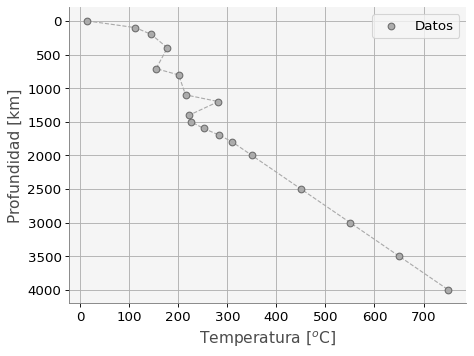

In [3]:
# Graficación de los datos 
plt.scatter(datos.Temp, datos.Depth, label='Datos',
            ec='dimgrey', fc='darkgrey', alpha=0.95, zorder=5, )
# Líneas que unen a los datos
plt.plot(datos.Temp, datos.Depth, 
         '--', color='darkgrey', lw = 1.0)

plt.gca().invert_yaxis() # Invertimos el eje y
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

**¿Qué interpretación le puedes dar a estos datos?**


## Ejemplo simple.

Supongamos que tenemos dos parejas de datos del tipo $(x, f(x))$ :

|$x$  | $f(x)$ |
|---|---|
|$3$|$54$|
|$5$|$123$|

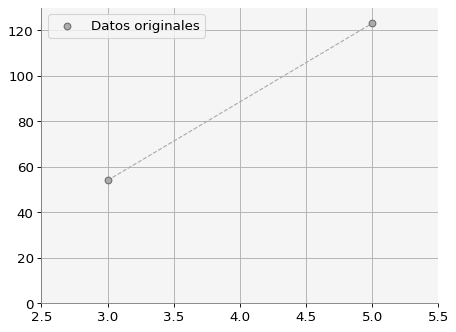

In [4]:
# Definimos los datos de la tabla
x0, f0 = 3, 54
x1, f1 = 5, 123

# Graficación de los datos 
plt.scatter([x0, x1], [f0, f1], ec='dimgray', fc='darkgray', alpha=0.95, zorder=5, 
            label='Datos originales')
# Líneas que unen a los datos
plt.plot([x0, x1], [f0, f1], '--', color='darkgray', lw = 1.0)

plt.xlim(2.5,5.5)
plt.ylim(0,130)
plt.legend()
plt.grid()
plt.show()

**¿Cual sería el valor de $f(x)$ para $x = 3.75$?**

## Construcción de una función lineal

Escribimos primero la ecuación de la recta como sigue:

$$
f(x) = m x + b \tag{1}
$$

donde la pendiente $m$ y la ordenada al origen $b$ se calculan como sigue, para dos pares de datos $(x_0, f(x_0))$ y $(x_1, f(x_1))$:

$$
m = \dfrac{f(x_1) - f(x_0)}{x_1 - x_0} \;\;\; \text{y} \;\;\; b = f(x_0) - m x_0
$$

Entonces, para realizar una interpolación lineal y encontrar $f(x)$ para $x=3.75$, usando los datos (`x0`, `f0`) y (`x1`, `f1`) definidos antes, calculamos $m$ y $b$ como sigue:

In [5]:
m = (f1 - f0) / (x1 - x0) # Pendiente
b = f0 - m * x0           # Ordenada al origen

print(f"m = {m}")
print(f"b = {b}")

m = 34.5
b = -49.5


Entonces, la ecuación de la recta $(1)$ se puede implementar como sigue:

In [6]:
S = lambda x, m, b: m * x + b

Evaluamos la ecuación de la recta en el punto $x = 3.75$ y obtenemos

In [7]:
x = 3.75
y = S(x, m, b)
print(f"Resultado de la interpolación lineal: {y}")

Resultado de la interpolación lineal: 79.875


Graficamos el resultado

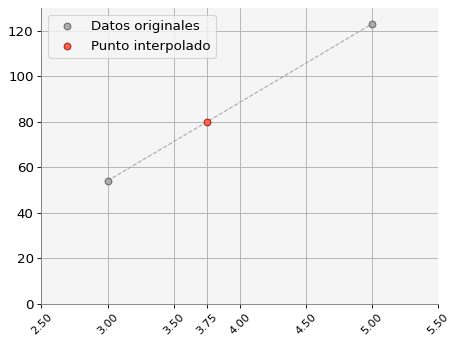

In [8]:
# Graficación de los datos 
plt.scatter([x0, x1], [f0, f1], ec='dimgray', fc='darkgray', alpha=0.95, zorder=5, 
            label='Datos originales')
# Líneas que unen a los datos
plt.plot([x0, x1], [f0, f1], '--', color='darkgray', lw = 1.0)

# Datos interpolados
plt.scatter(x, y, ec='brown', fc='tomato', zorder=5, 
            label='Punto interpolado') 

plt.xlim(2.5,5.5)
plt.ylim(0,130)
plt.xticks([2.5, 3.0, 3.5, 3.75, 4.0, 4.5, 5.0, 5.5], 
           fontsize=10, rotation=45)
plt.legend()
plt.grid()
plt.show()

## Aplicación a un punto del ejemplo real.

Veamos nuevamente los datos de (*Canet et al. (2015)*)  de manera gráfica.

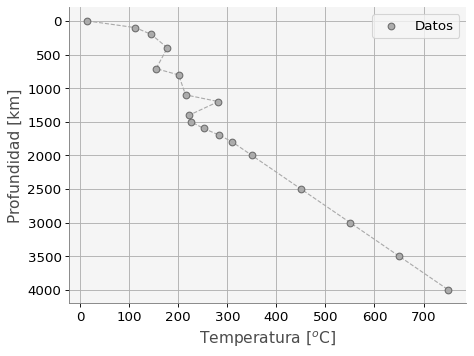

In [9]:
# Graficación de los datos 
plt.scatter(datos.Temp, datos.Depth, label='Datos',
            ec='dimgrey', fc='darkgrey', alpha=0.95, zorder=5, )
# Líneas que unen a los datos
plt.plot(datos.Temp, datos.Depth, 
         '--', color='darkgrey', lw = 1.0)

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

Vamos a seleccionar dos pares del conjunto de datos, por ejemplo:

In [10]:
datos.iloc[13:15]

,Depth,Temp
13,2000,350
14,2500,450


Con estos datos haremos una interpolación lineal entre una profundidad de $2000$ y $2500$ metros. Por ejemplo en el punto medio $2250$.

In [11]:
# Obtenemos los datos del DataFrame
x0, f0 = datos.iloc[13,0], datos.iloc[13,1]
x1, f1 = datos.iloc[14,0], datos.iloc[14,1]

m = (f1 - f0) / (x1 - x0) # Pendiente
b = f0 - m * x0           # Ordenada al origen

# Aplicamos la interpolación en el punto requerido.
xj = (x0 + x1) * 0.5 # Punto medio entre x0 y x1
yj = S(xj, m, b)
print(f"Resultado de la interpolación: {yj}")

Resultado de la interpolación: 400.0


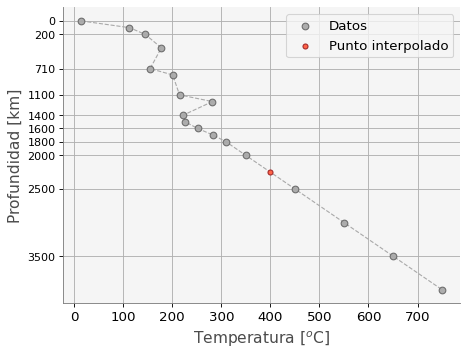

In [12]:
# Graficación de los datos 
plt.scatter(datos.Temp, datos.Depth, label='Datos',
            ec='dimgrey', fc='darkgrey', alpha=0.95, zorder=5, )
# Líneas que unen a los datos
plt.plot(datos.Temp, datos.Depth, 
         '--', color='darkgrey', lw = 1.0)

# Datos interpolados
plt.scatter(yj, xj, ec='brown', fc='tomato', s = 20, zorder=5, 
            label='Punto interpolado') 

# Generamos unos ticks en el eje y
yticks = list(datos.Depth[::2])
yticks.append(x0)

plt.gca().invert_yaxis()
plt.yticks(ticks = yticks, labels = yticks, fontsize=10)
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

## Aplicación a todo el conjunto de datos

Supongamos que deseamos conocer la temperatura en 100 puntos de profundidad igualmente espaciados desde $0$ a $4000$ metros. Podemos interpolar linealmente entre cada par de datos. Para ello es conveniente construir una función que genere todos los puntos de interpolación. Esta función se muestra en la siguiente celda.

In [13]:
def lineal(x, f, z):
    """
    Parameters:
    x: Arreglo de datos
    f: Arreglo de datos correspondientes con el arreglo x
    z: Arreglo de datos donde se desea interpolar.
    """
    k = len(x)-1  # Número de intervalos 
    m = np.zeros(k) # Arreglo para las pendientes

    # Cálculo de las pendientes de cada intervalo
    for i in range(k):
        m[i] = (f[i + 1] - f[i]) / (x[i + 1] - x[i]) 

    # Arreglo para almacenar la interpolación
    y = np.zeros_like(z)

    # Recorremos todos los datos z
    for j, xj in enumerate(z): 
        # Por cada intervalo se hace la interpolación lineal
        for i in range(k):
            # Si el dato cae en el intervalo, entonces
            if xj >= x[i] and xj <= x[i + 1]:
                # Calculo de la interpolación lineal
                y[j] = S(xj, m[i], f[i] - x[i] * m[i]) 
                break
    return y # Regresamos las interpolaciones

Ahora aplicamos la función a los datos siguientes:

In [14]:
L = max(datos.Depth)        # Profundidad máxima
N = 99                      # Número de incógnitas
z = np.linspace(0, L, N+2)  # Coordenada z de la profundidad
yint= lineal(datos.Depth, datos.Temp, z) # Interpolación lineal

Graficamos los datos reales y los interpolados:

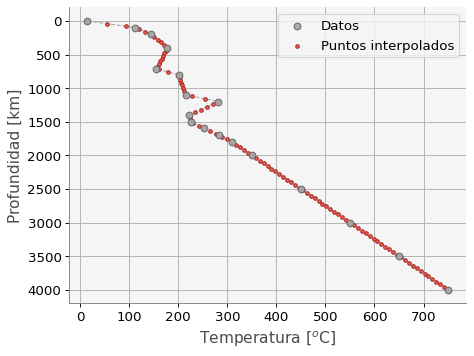

In [15]:
# Graficación de los datos 
plt.scatter(datos.Temp, datos.Depth, label='Datos',
            ec='dimgrey', fc='darkgrey', alpha=0.95, zorder=5, )
# Líneas que unen a los datos
plt.plot(datos.Temp, datos.Depth, 
         '--', color='darkgrey', lw = 1.0)

# Datos interpolados
plt.scatter(yint, z, ec='brown', fc='tomato', s = 10, zorder=3, 
            label='Puntos interpolados') 

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

Con base en este resultado:

* ¿Qué opinas de esta interpolación?
* ¿Es correcta numéricamente?
* ¿Reproduce la realidad?
* ¿La usarías en algún proyecto? ¿Por qué?
* ¿Cómo podrías mejorar esta interpolación?